<a href="https://colab.research.google.com/github/nihal-rao/Integrated-Real-time-2D-hand-pose/blob/master/Evaluation_NZSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install detectron2

In [ ]:
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/torch1.4/detectron2-0.1.1%2Bcu100-cp36-cp36m-linux_x86_64.whl

In [ ]:
import shutil
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/fpn_keypoint.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/backbone/fpn_keypoint.py" )
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/retinanet_keypoint_only.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/meta_arch/retinanet_keypoint.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/roi_head_mod_final.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/roi_head_mod.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/roi_head_init.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/__init__.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/backbone_init.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/backbone/__init__.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/meta_arch_init.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/meta_arch/__init__.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/train_loop.py","/usr/local/lib/python3.6/dist-packages/detectron2/engine/train_loop.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/det_checkpoint.py","/usr/local/lib/python3.6/dist-packages/detectron2/checkpoint/detection_checkpoint.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/build.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/meta_arch/build.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/keypoint_head_xy.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/keypoint_head.py")

In [ ]:
import numpy as np
import os
import cv2
import random
from google.colab.patches import cv2_imshow
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import scipy.integrate


##Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
from detectron2.data.datasets import register_coco_instances
import os
import numpy as np
import json
from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog

register_coco_instances("nzsl_train", {}, "/content/drive/My Drive/NZSL/hands_keypoints_train.json", "/content/drive/My Drive/NZSL/train_imgs")
register_coco_instances("nzsl_test", {}, "/content/drive/My Drive/NZSL/hands_keypoints_test.json", "/content/drive/My Drive/NZSL/test_imgs")

train_metadata = MetadataCatalog.get("nzsl_train")
val_metadata = MetadataCatalog.get("nzsl_test")

[06/20 08:43:36 d2.data.datasets.coco]: Loaded 515 images in COCO format from /content/drive/My Drive/NZSL/hands_keypoints_train.json


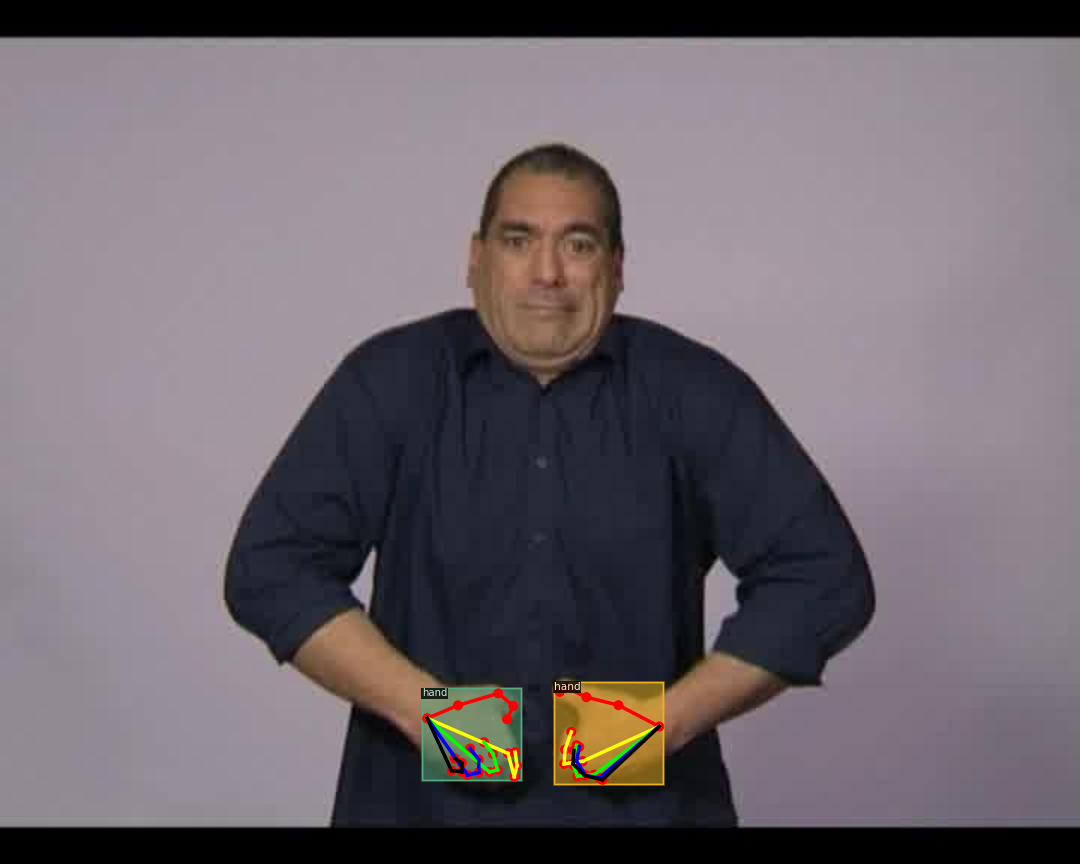

/content/drive/My Drive/NZSL/train_imgs/Ricki_unit_8.flv_000082_.jpg


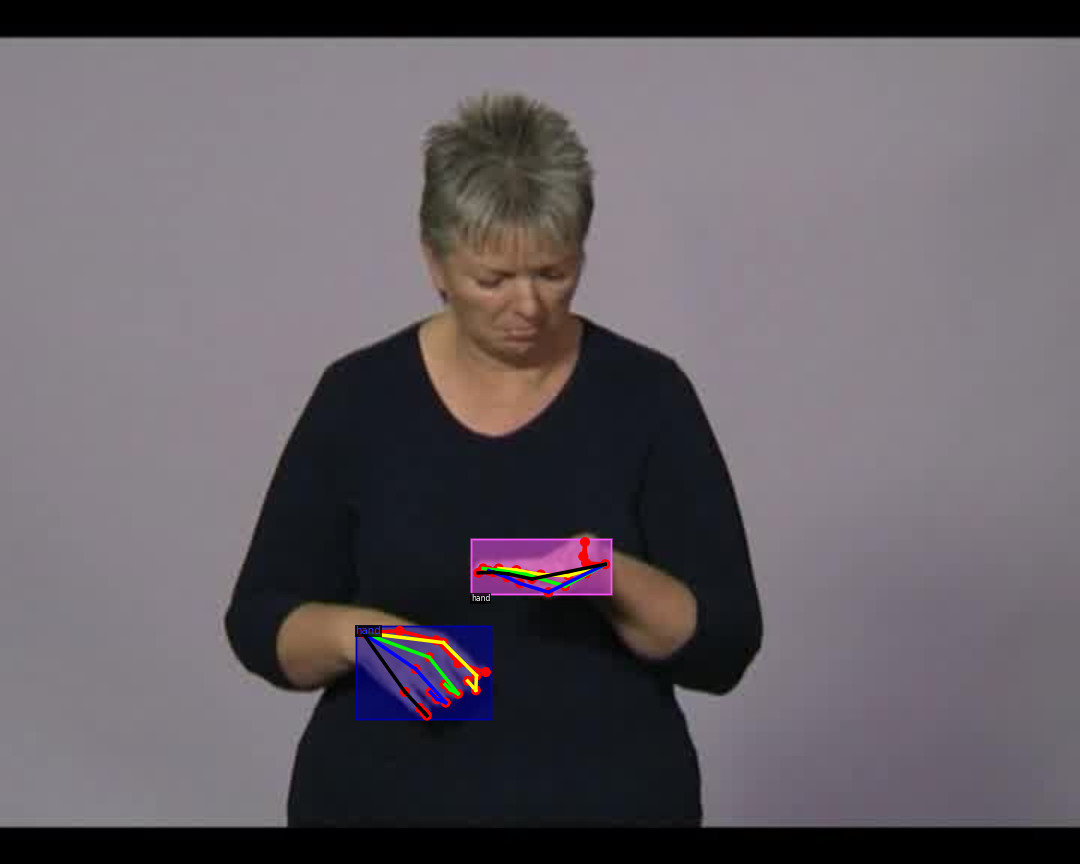

/content/drive/My Drive/NZSL/train_imgs/Jackie_unit_10.flv_000137_.jpg


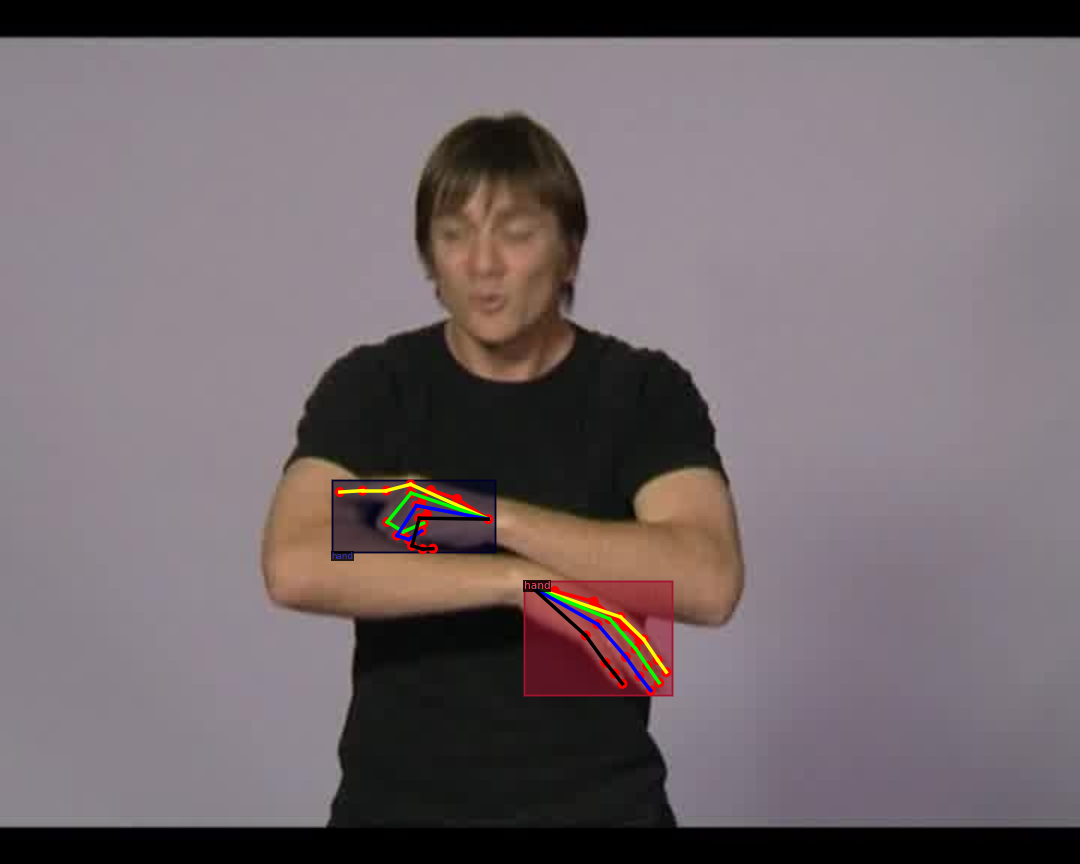

/content/drive/My Drive/NZSL/train_imgs/Alexander_mouse_cat_rooster.flv_000141_.jpg


In [ ]:
from detectron2.utils.visualizer import Visualizer

dataset_dicts = DatasetCatalog.get("nzsl_train")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=1.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])
    print(d["file_name"])

In [ ]:
val_metadata.keypoint_flip_map=[]
val_metadata.keypoint_names=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"]
val_metadata.keypoint_connection_rules=[("0","1",(255,0,0)),("1",'2',(255,0,0)),('2','3',(255,0,0)),('3','4',(255,0,0)),('0','5',(255,255,0)),('5','6',(255,255,0)),('6','7',(255,255,0)),('7','8',(255,255,0)),('0','9',(0,255,0)),('9','10',(0,255,0)),('10','11',(0,255,0)),('11','12',(0,255,0)),('0','13',(0,0,255)),('13','14',(0,0,255)),('14','15',(0,0,255)),('15','16',(0,0,255)),('0','17',(0,0,0)),('17','18',(0,0,0)),('18','19',(0,0,0)),('19','20',(0,0,0))]

In [ ]:
train_metadata.keypoint_names=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"]
train_metadata.keypoint_connection_rules=[("0","1",(255,0,0)),("1",'2',(255,0,0)),('2','3',(255,0,0)),('3','4',(255,0,0)),('0','5',(255,255,0)),('5','6',(255,255,0)),('6','7',(255,255,0)),('7','8',(255,255,0)),('0','9',(0,255,0)),('9','10',(0,255,0)),('10','11',(0,255,0)),('11','12',(0,255,0)),('0','13',(0,0,255)),('13','14',(0,0,255)),('14','15',(0,0,255)),('15','16',(0,0,255)),('0','17',(0,0,0)),('17','18',(0,0,0)),('18','19',(0,0,0)),('19','20',(0,0,0))]
train_metadata.keypoint_flip_map=[]

## Evaluation using the trained model


In [ ]:
"""
Creating predictor from the trained model
"""
cfg = get_cfg()
cfg.merge_from_file("/content/drive/My Drive/KP_RN_Configs/KP_RN_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("nzsl_train",)
cfg.DATASETS.VAL = ()
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.MODEL.DEVICE = "cuda"
cfg.MODEL.WEIGHTS = '/content/drive/My Drive/KPRetinaNet_L1_loss_18k_xy/model_final.pth'
cfg.SOLVER.BASE_LR = 0.0001 
cfg.VIS_PERIOD = 0
cfg.MODEL.ROI_HEADS.PROPOSAL_APPEND_GT = False
cfg.MODEL.ROI_KEYPOINT_HEAD.LOSS_WEIGHT = 1.0
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 2
cfg.MODEL.ROI_HEADS.POSITIVE_FRACTION = 1.0
cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[x, x * 2**(1.0/3), x * 2**(2.0/3) ] for x in [64, 128, 256, 512 ]] 
cfg.SOLVER.MAX_ITER = 1
cfg.SOLVER.WARMUP_ITERS = 1
cfg.OUTPUT_DIR = "./output3"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

cfg.INPUT.MIN_SIZE_TEST = (800)
cfg.INPUT.MIN_SIZE_TRAIN = (800)
cfg.MODEL.WEIGHTS = '/content/drive/My Drive/KPRetinaNet_L1_loss_14k_xy/model_final.pth'
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = ("nzsl_test", )
predictor = DefaultPredictor(cfg)

[07/03 15:13:11 d2.data.datasets.coco]: Loaded 231 images in COCO format from /content/drive/My Drive/NZSL/hands_keypoints_test.json


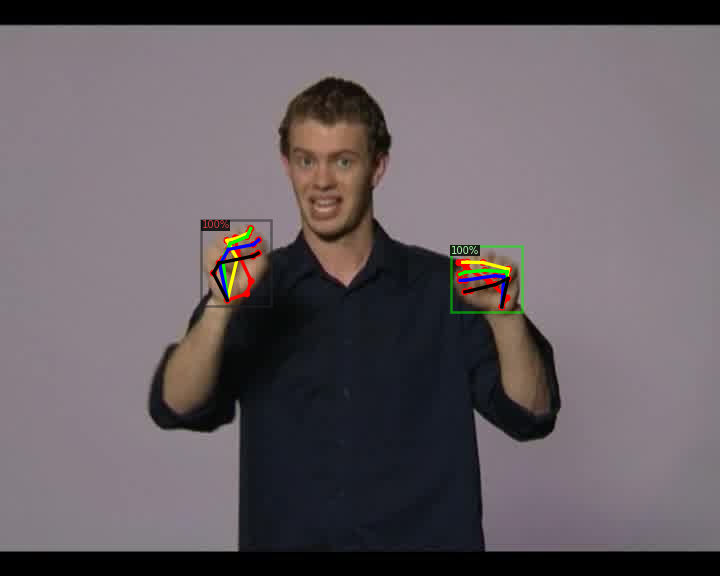

{'file_name': '/content/drive/My Drive/NZSL/test_imgs/Berry_sermon_story.flv_000085_.jpg', 'height': 576, 'width': 720, 'image_id': 10, 'annotations': [{'iscrowd': 0, 'bbox': [210.4205947875977, 222.74856414794922, 54.68105773925769, 74.39371032714844], 'keypoints': [232.8778533935547, 294.2607421875, 2.0, 248.29454040527344, 283.79025268554693, 2.0, 261.6089782714843, 262.8492736816407, 2.0, 263.1161499023437, 247.48672485351565, 2.0, 259.41870117187494, 235.62707519531247, 2.0, 246.27224731445318, 226.63009643554688, 2.0, 254.89959716796875, 243.80613708496097, 2.0, 253.25630187988278, 256.0747528076172, 2.0, 252.02381896972656, 254.02998352050776, 2.0, 233.94743347167974, 233.17335510253903, 2.0, 243.39645385742193, 248.30462646484375, 2.0, 243.39645385742193, 256.89266967773443, 2.0, 240.5206756591797, 255.66580200195312, 2.0, 222.85511779785156, 237.6718444824219, 2.0, 236.00157165527344, 251.9852142333984, 2.0, 237.64488220214835, 261.39114379882807, 2.0, 234.76908874511716, 258.

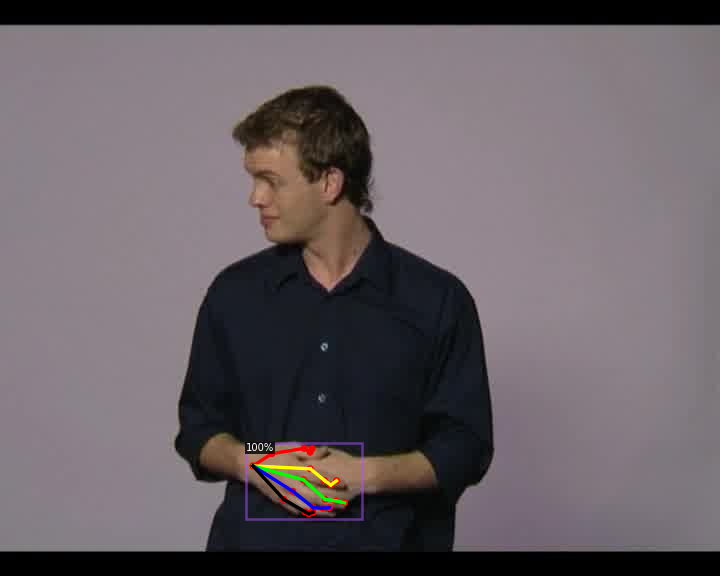

{'file_name': '/content/drive/My Drive/NZSL/test_imgs/Berry_roof_story.flv_000101_.jpg', 'height': 576, 'width': 720, 'image_id': 18, 'annotations': [{'iscrowd': 0, 'bbox': [248.31041793823243, 445.6926834106445, 100.23046722412107, 71.71158752441407], 'keypoints': [253.3663482666016, 466.56735229492193, 2.0, 271.2355346679687, 456.64062500000006, 2.0, 295.29019165039057, 449.4523010253906, 2.0, 311.441162109375, 454.24450683593756, 2.0, 326.08145141601557, 450.32296752929693, 2.0, 292.0154113769531, 467.4754333496093, 2.0, 309.6358032226563, 475.2720031738282, 2.0, 326.08145141601557, 481.1194152832031, 2.0, 344.4849548339844, 486.96685791015625, 2.0, 288.8829040527344, 484.2380676269531, 2.0, 312.37673950195307, 499.0515441894532, 2.0, 326.47302246093744, 503.7294921875, 2.0, 344.4849548339844, 506.0684509277344, 2.0, 282.61788940429693, 494.763427734375, 2.0, 304.54547119140636, 509.57690429687494, 2.0, 321.7742614746094, 513.0853881835938, 2.0, 335.87054443359375, 514.6446533203125

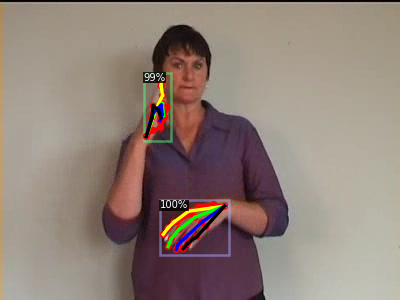

{'file_name': '/content/drive/My Drive/NZSL/test_imgs/ex2_2.flv_000006_.jpg', 'height': 300, 'width': 400, 'image_id': 113, 'annotations': [{'iscrowd': 0, 'bbox': [141.45226440429687, 79.12757568359373, 28.330975341796847, 62.124822998046895], 'keypoints': [143.2400360107422, 138.9285430908203, 2.0, 143.95545959472656, 129.6641540527344, 2.0, 152.89833068847662, 118.7963180541992, 2.0, 159.1583251953125, 112.02619171142577, 2.0, 164.52403259277344, 108.81929016113283, 2.0, 149.50003051757815, 112.91699981689452, 2.0, 155.93888854980472, 98.66410064697267, 2.0, 159.87374877929688, 90.64684295654295, 2.0, 162.91432189941406, 84.05487823486327, 2.0, 152.18289184570318, 113.80780029296875, 2.0, 158.44290161132812, 99.37674713134764, 2.0, 162.73547363281247, 90.4686813354492, 2.0, 165.95489501953125, 82.45143127441405, 2.0, 154.32321166992188, 116.91060638427737, 2.0, 164.8327789306641, 108.26918792724611, 2.0, 167.0280456542969, 117.01470947265625, 2.0, 165.06060791015625, 122.003219604492

In [ ]:
"""
Some predictions from the model on the test set
"""
from detectron2.utils.visualizer import Visualizer

dataset_dicts = DatasetCatalog.get("nzsl_test")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)
    v = Visualizer(img[:, :, ::-1],
                   metadata=train_metadata, 
                   scale=1.0, 
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])
    print(d)

In [ ]:
"""
cfg2 is a dummy config used to easily read the ground truth keypoints for comparison with predicted keypoints
"""
cfg2 = get_cfg()
cfg2.merge_from_file("/content/drive/My Drive/KP_RN_Configs/KP_RN_FPN_3x.yaml")
cfg2.DATASETS.TRAIN = ("nzsl_train",)
cfg2.DATASETS.VAL = ()
cfg2.DATASETS.TEST = ()
cfg2.DATALOADER.NUM_WORKERS = 2
cfg2.SOLVER.IMS_PER_BATCH = 4
cfg2.MODEL.DEVICE = "cuda"
cfg2.MODEL.WEIGHTS = '/content/drive/My Drive/KPRetinaNet_L1_loss_14k_xy/model_final.pth'
cfg2.SOLVER.BASE_LR = 0.0001 
cfg2.VIS_PERIOD = 0

cfg2.MODEL.ROI_KEYPOINT_HEAD.LOSS_WEIGHT = 1.0
cfg2.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 2
cfg2.MODEL.ROI_HEADS.POSITIVE_FRACTION = 1.0
cfg2.MODEL.ANCHOR_GENERATOR.SIZES = [[x, x * 2**(1.0/3), x * 2**(2.0/3) ] for x in [64, 128, 256, 512 ]] 
cfg2.SOLVER.MAX_ITER = 2
cfg2.SOLVER.WARMUP_ITERS = 1
cfg2.INPUT.MIN_SIZE_TRAIN = 0

### The cells below are used to determine EPE and PCK.

In [ ]:
with open('/content/drive/My Drive/NZSL/hands_keypoints_test.json') as f:
  ann_raw_data = json.load(f)
head_size = {}
for i in range(len(ann_raw_data['annotations'])):
  head_size[ann_raw_data['annotations'][i]['image_id']] = ann_raw_data['annotations'][i]['head_size']

In [ ]:
from detectron2.data import DatasetMapper
from detectron2.utils.visualizer import Visualizer
import torch
map = DatasetMapper(cfg2)
avg_err_list = [] #this list contains the EPE for each image, the mean of this list gives the EPE over all images
ind_err_list = [] #this list contains the normalised error w.r.t 0.7 times head size as per Liu et. al, used in calculating PCK

dataset_dicts = DatasetCatalog.get("nzsl_test")
for d in dataset_dicts:
  img = cv2.imread(d["file_name"])
  outputs = predictor(img)
  """
  v = Visualizer(img[:, :, ::-1],
                   metadata=val_metadata, 
                   scale=1.0, 
  )
  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(v.get_image()[:, :, ::-1])
  """
  gt_boxes = map(d)['instances'].gt_boxes.tensor.cuda()
  pred_boxes = outputs['instances'].pred_boxes.tensor
  if(len(map(d)['instances']) == len(outputs["instances"])):
    for i in range(len(map(d)['instances'])):
      ind=0
      norm_min = float('inf')
      for j in range(len(map(d)['instances'])):
        norm = torch.dist(gt_boxes[i],pred_boxes[j],p=1)
        if norm < norm_min:
          norm_min = norm
          ind = j
      gt_kps = map(d)['instances'].gt_keypoints.tensor[i].cuda()
      pred_kps = outputs['instances'].pred_keypoints[ind]
      error = torch.pow(torch.sum((gt_kps[:,:2]-pred_kps[:,:2])**2,dim=-1),.5)
      error = error.cpu().detach().numpy()
      avg_err_list.append(np.mean(error))
      error = error/(0.7*head_size[d['image_id']])
      ind_err_list.extend(error.tolist())

[08/05 12:02:28 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(0, 0), max_size=1333, sample_style='choice')]
[08/05 12:02:28 d2.data.datasets.coco]: Loaded 231 images in COCO format from /content/drive/My Drive/NZSL/hands_keypoints_test.json


In [ ]:
thresholds = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
pck = []
for i in thresholds:
  pck.append(np.mean(ind_err<i))

In [ ]:
print(pck)

[0.0, 0.46154939587775407, 0.8083866382373845, 0.9235252309879175, 0.9681592039800995, 0.9849324804548685, 0.9916133617626155, 0.996730632551528, 0.998862828713575, 0.9997157071783938, 1.0]


In [ ]:
sum(err_list)/len(err_list)#EPE

10.180462089937125

In [ ]:
print(scipy.integrate.simps(pck,thresholds))#PCK

0.8666619284529733
